# Python for Data Science Practicce Session 1: Social Sciences

## How is Coronavirus Affecting Lives Across the World?

The [COVIDiSTRESS global survey](https://osf.io/z39us/) is an international collaborative undertaking for gathering data on human experiences, behaviour and attitudes during the COVID-19 pandemic. The survey focuses on psychological stress, compliance with behavioural guidelines to slow the spread of Coronavirus, and trust in governmental institutions and their preventive measures. 

In this notebook we are going to use the results of the COVIDiSTRESS survey conducted in April–May 2020 to investigate the impact of the Coronavirus pandemic on the perceived level of stress by individuals across the world as well as explore other related factors. 

Before we get started we need to import the `pandas` packages

In [1]:
# Import pandas
import pandas as pd

## Data Preprocessing

### Import

You can download the relevant dataset as a CSV file from this session's [materials](https://education.wdss.io/python-for-data-science/session-one/).

This dataset is more complex than the one we looked at in the teaching session and so we will need to acquaint ourselves with some more optional arguments of the `read_csv` function. Namely, look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) of the function, to see what the following parameters are for:

- `low_memory`
- `parse_dates`
- `dayfirst`
- `index_col`

Use this knowledge to import the dataset and assign it to the variable `raw_df`. Pay close attention to the following points:

- The dataset has a date column `RecordedDate` which uses day first format
- Because many columns have lots of missing values, there will likely be mixed type inference (a bad thing) when using low memory mode
- The first column of the dataset consists of row numbers which should be read as an index

In [2]:
raw_df = pd.read_csv(
    'data/covidstress.csv',
    low_memory = False,
    parse_dates=['RecordedDate'],
    dayfirst=True,
    index_col=0
)

> **Bonus**
>
> Suppose we didn't trust the index column of the original dataset. How could we use the default index provide by `pandas` instead?

Let's explore the dataset by doing the following:
- Print the first 3 rows of the dataset
- Print the dimensions of the dataset
- Print numerical summaries of the columns
- Print the data types of the columns

In [3]:
# First 3 rows
raw_df.head(3)

,Duration..in.seconds.,RecordedDate,UserLanguage,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,...,Final_open,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Scale_UCLA_TRI_avg
1,180,2020-05-30 23:47:00,SAR,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,Argentina,yes,...,NaN,2.9,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3100,2020-05-29 23:30:00,UR,20,Male,"College degree, bachelor, master",None,Student,Pakistan,yes,...,NaN,2.2,2.333333,2.0,5.0,5.333333,5.0,5.0,5.0,NaN
3,127,2020-05-30 22:40:00,SAR,47,Female,"Some College, short continuing education or eq...",Some College or equivalent,Self-employed,Argentina,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Dimensions of the dataset
raw_df.shape

(65535, 152)

In [5]:
# Numerical summaries of the columns
raw_df.describe()

,Duration..in.seconds.,Dem_age,Dem_dependents,Dem_isolation_adults,Dem_isolation_kids,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,...,Expl_media_6,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Scale_UCLA_TRI_avg
count,6.553500e+04,65535.000000,63317.000000,53379.000000,52463.000000,60336.000000,60312.000000,60344.000000,60274.000000,60253.000000,...,48753.00000,60811.000000,60673.000000,56884.000000,56858.000000,56856.000000,56869.000000,56865.000000,49669.000000,51.000000
mean,2.125383e+03,40.741375,0.933146,1.533937,0.484513,2.556782,2.663450,3.078019,3.683612,3.158266,...,3.31034,2.628514,2.581236,3.316275,3.999156,4.478871,4.439443,4.380509,4.849583,1.818627
std,9.888777e+03,14.322085,1.805861,3.231931,1.275804,1.094821,1.104996,1.112253,1.049348,0.968456,...,1.37873,0.735439,0.990043,1.050524,1.116921,0.947898,0.832629,0.890780,0.907215,0.968060
min,2.900000e+01,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7.120000e+02,29.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,2.00000,2.100000,2.000000,2.666667,3.333333,4.000000,4.000000,3.666667,4.400000,1.000000
50%,1.013000e+03,40.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000,4.000000,3.000000,...,3.00000,2.600000,2.666667,3.333333,4.000000,4.666667,4.666667,4.333333,5.000000,1.750000
75%,1.454000e+03,51.000000,2.000000,2.000000,1.000000,3.000000,3.000000,4.000000,4.000000,4.000000,...,4.00000,3.100000,3.333333,4.000000,5.000000,5.000000,5.000000,5.000000,5.500000,2.500000
max,1.040679e+06,110.000000,110.000000,110.000000,110.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,6.00000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000


In [6]:
# Data types of columns
raw_df.dtypes

Duration..in.seconds.             int64
RecordedDate             datetime64[ns]
UserLanguage                     object
Dem_age                           int64
Dem_gender                       object
                              ...      
ope                             float64
agr                             float64
con                             float64
SPS_avg                         float64
Scale_UCLA_TRI_avg              float64
Length: 152, dtype: object

> **Bonus**
>
> When printing the above, we only get to see 10 columns in total. For printing out full datasets and series, checkout the [option context](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.option_context.html)

### Cleaning

There are 152 columns in the dataset, many of which we won't need in our analysis. Instead, we want to focus on the following variables.

| description | variable name | measurement |
| --- | --- | --- |
| date of record | `RecordedDate` | date "DD/MM/YYYY hh:mm"
| age | `Dem_age` | age in years
| gender | `Dem_gender` | Male/Female
| country | `Country` | country name
| employment status| `Dem_employment` | type of employment
| perceived stress for the past week | `Scale_PSS10_UCLA_1` to `Scale_PSS10_UCLA_10` | 1=never, 5=very often; 10 items
| trust in institutions | `OECD_insititutions_1` (government), `OECD_insititutions_4` (health system) | 0=not at all, 10=completely
| trust in country's preventive measures | `Trust_countrymeasure` | 0=too little, 5= appropriate, 11=too much

Stress was meassured in 10 different categories. Create a list, `stress_columns` of column names `Scale_PSS10_UCLA_X`, where `X` ranges from 1 to 10.

In [7]:
stress_columns = ['Scale_PSS10_UCLA_' + str(x) for x in range(1, 11)]

We can then combine these with the other column names.

In [8]:
columns = [
    'RecordedDate', 'Dem_age', 'Dem_gender', 'Country', 'Dem_employment',
    'OECD_insititutions_1', 'OECD_insititutions_4', 'Trust_countrymeasure'
] + stress_columns

Now, create a subset of this dataset, `covid_stress`, containing only columns of interest.

In [9]:
covid_stress = raw_df[columns]

The original dataset is fairly large so we may want to remove it from memory now that we no longer need it.

In [10]:
# Clear up memory
del raw_df

Many fields in the dataset have missing/unknown values. We can use `covid_stress.isna()` to return a Boolean dataset where each value is `True` if the original value in that field was missing. Let's investigate where these missing values are.

> Remember, `True`/`False` are converted to `1`/`0` respectively when cast to integers. This means we can use the `sum` and `mean` methods on a Boolean dataset or series to count or find proportions of `True`'s

In [11]:
# How many missing values are there in each column?
covid_stress.isna().sum()

RecordedDate               0
Dem_age                    0
Dem_gender               154
Country                  345
Dem_employment           659
OECD_insititutions_1    8074
OECD_insititutions_4    7547
Trust_countrymeasure    7304
Scale_PSS10_UCLA_1      5199
Scale_PSS10_UCLA_2      5223
Scale_PSS10_UCLA_3      5191
Scale_PSS10_UCLA_4      5261
Scale_PSS10_UCLA_5      5282
Scale_PSS10_UCLA_6      5188
Scale_PSS10_UCLA_7      5277
Scale_PSS10_UCLA_8      5298
Scale_PSS10_UCLA_9      5163
Scale_PSS10_UCLA_10     5190
dtype: int64

In [12]:
# What proportion of records (rows) have at least one missing value?
covid_stress.isna().any(axis=1).mean()

0.1706111238269627

Given that we have 65535 records in total we can drop all the records with at least one missing value and still have many tens of thousands left. We will learn how to deal with missing values properly in later sessions.

To do this, we use the `dropna` method of the dataframe. Search for "pandas drop missing values" on the web to find the documentation for this. Save the cleaned dataset as `covid_stress_clean`

In [13]:
covid_stress_clean = covid_stress.dropna()

> **Bonus**
>
> Recall from the teaching session that many pandas operations can be done _inplace_. How would we drop rows with missing values in this fashion (check the documentation again if needed).

Let's take a random sample of 10 rows and verify that they have no missing values.

In [14]:
# Random sample of cleaned dataset
covid_stress_clean.sample(10)

,RecordedDate,Dem_age,Dem_gender,Country,Dem_employment,OECD_insititutions_1,OECD_insititutions_4,Trust_countrymeasure,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10
50248,2020-04-05 12:00:00,24,Female,Pakistan,Part time employed,3.0,4.0,4.0,5.0,5.0,5.0,2.0,1.0,5.0,1.0,3.0,5.0,4.0
14773,2020-04-17 11:32:00,28,Female,Denmark,Part time employed,5.0,9.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0
53197,2020-04-05 05:10:00,38,Female,Japan,Not employed,5.0,5.0,4.0,3.0,4.0,4.0,3.0,2.0,5.0,2.0,3.0,3.0,3.0
19806,2020-04-14 17:15:00,52,Female,Finland,Full time employed,8.0,8.0,5.0,4.0,1.0,3.0,5.0,3.0,1.0,1.0,4.0,4.0,3.0
17903,2020-04-17 12:11:00,44,Female,Netherlands,Full time employed,7.0,10.0,5.0,1.0,1.0,2.0,5.0,4.0,1.0,5.0,5.0,1.0,1.0
23,2020-05-29 18:03:00,28,Female,France,Full time employed,1.0,7.0,0.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,3.0
25943,2020-04-12 00:05:00,52,Female,Finland,Full time employed,9.0,8.0,5.0,2.0,2.0,2.0,5.0,4.0,1.0,4.0,4.0,3.0,1.0
60117,2020-04-04 10:38:00,46,Female,Taiwan,Full time employed,8.0,8.0,8.0,2.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,2.0,2.0
46346,2020-04-06 03:42:00,50,Female,Japan,Not employed,1.0,7.0,5.0,1.0,1.0,2.0,3.0,5.0,2.0,1.0,3.0,2.0,1.0
12264,2020-04-20 15:20:00,38,Male,Czech Republic,Full time employed,5.0,10.0,6.0,1.0,2.0,1.0,5.0,3.0,2.0,3.0,4.0,1.0,1.0


> Note, the `covid_stress` dataset isn't too large so we don't need to worry about deleting it. Sometimes it's worth holding onto these things in case we need to go back to them and don't want to rerun cells. How big is the dataset exactly? Have a look at the documentation for the `info` method, which can answer this.

### Feature Engineering

Before we continue, we will make a copy of the current dataframe. This will make it easier to return to this point by rerunning this cell if any mistakes are made.

In [15]:
covid_df = covid_stress_clean.copy()

The levels of stress were measured in 10 different categories on a scale from 1=never, 5=very often. We want analyse only aggregated information about the stress level, i.e. the mean of those 10 values. For this, we create a new column `Avg_stress`

In [16]:
# Create new column by averaging all stress columns
covid_df['Avg_stress'] = covid_df[stress_columns].mean(axis=1)

# Drop the now redundant stress columns
covid_df = covid_df.drop(stress_columns, axis=1)

The column names `OECD_insititutions_1`, `OECD_insititutions_4` are not the most friendly. Let's rename them to something more intuitive.

In [17]:
mapper = {
    "OECD_insititutions_1" : "Trust_gov",
    "OECD_insititutions_4" : "Trust_health"
}
covid_df = covid_df.rename(mapper, axis=1)

We're now ready to start answering questions about the dataset. Let's print out the data types of the columns to check that everything is as expected before we continue.

In [18]:
covid_df.dtypes

RecordedDate            datetime64[ns]
Dem_age                          int64
Dem_gender                      object
Country                         object
Dem_employment                  object
Trust_gov                      float64
Trust_health                   float64
Trust_countrymeasure           float64
Avg_stress                     float64
dtype: object

Check that the variable types of each of the column is as expected

## Data Analysis

### High-level Questions

When the study was conducted? (i.e. what is the range of dates in the records?)

In [21]:
# Minimum and maximum dates in dataset
print(covid_df.RecordedDate.min())
print(covid_df.RecordedDate.max())

2020-04-03 14:34:00
2020-05-30 20:14:00


What proportion of observations are from Finland, Sweden, or Norway? Use `.round()` to print the answer to 3 decimal places.

In [42]:
# Proportion of Finish, Swedish, Norwegian respondents
covid_df['Country'].isin(["Finland", "Norway", "Sweden"]).mean().round(3)

0.321

Print the dataset sorted by age in descending order.

In [29]:
# Sort by decreasing age
covid_df.sort_values('Dem_age', ascending=False)

,RecordedDate,Dem_age,Dem_gender,Country,Dem_employment,Trust_gov,Trust_health,Trust_countrymeasure,Avg_stress
11825,2020-04-22 21:34:00,110,Female,Argentina,Self-employed,6.0,4.0,8.0,3.1
27914,2020-04-10 12:19:00,108,Female,Finland,Retired,9.0,9.0,5.0,2.7
46264,2020-04-06 03:52:00,101,Male,Colombia,Retired,0.0,0.0,1.0,1.3
10156,2020-04-26 14:11:00,98,Male,Armenia,Part time employed,1.0,1.0,10.0,2.7
11975,2020-04-22 11:29:00,92,Female,Denmark,Retired,9.0,9.0,5.0,2.5
...,...,...,...,...,...,...,...,...,...
9428,2020-04-29 19:12:00,18,Male,Argentina,Student,3.0,7.0,3.0,3.1
44588,2020-04-06 10:12:00,18,Female,France,Student,1.0,4.0,4.0,2.5
28499,2020-04-11 06:45:00,18,Female,Croatia,Student,5.0,10.0,5.0,2.8
63009,2020-04-04 02:15:00,18,Female,Finland,Student,9.0,9.0,5.0,3.0


What about the median value for age? Print your answer as part of a meaningful sentence.

In [41]:
# Median age of respondents
print("The median age of respondents is", covid_df.Dem_age.median())

The median age of respondents is 40.0


### Characteristics of Respondents

What is the gender breakdown of respondents? Use the `value_counts` method to find out (after searching for its documentation of course).

In [31]:
# Gender breakdown
covid_df['Dem_gender'].value_counts()

Female                        40286
Male                          13468
Other/would rather not say      600
Name: Dem_gender, dtype: int64

It would be nicer to see percentages rather than absolute counts. There are many ways to do this. Take your pick or write down as many as you can think of.

In [34]:
# Gender breakdown as proportions (Method 1)
covid_df['Dem_gender'].value_counts() / covid_df.shape[0] * 100

Female                        74.117820
Male                          24.778305
Other/would rather not say     1.103875
Name: Dem_gender, dtype: float64

In [35]:
# Gender breakdown as proportions (Method 2)
covid_df['Dem_gender'].value_counts(normalize=True) * 100

Female                        74.117820
Male                          24.778305
Other/would rather not say     1.103875
Name: Dem_gender, dtype: float64

In [36]:
# Gender breakdown as proportions (Method 3)
counts = covid_df['Dem_gender'].value_counts()
counts / counts.sum() * 100

Female                        74.117820
Male                          24.778305
Other/would rather not say     1.103875
Name: Dem_gender, dtype: float64

Suppose we want to divide the respondents in 4 age of equal width, how many respondents would land in each group? (This can also be performed using `value_counts` too)

In [40]:
# Binned value counts
covid_df['Dem_age'].value_counts(bins=4)

(17.907, 41.0]    29455
(41.0, 64.0]      21459
(64.0, 87.0]       3427
(87.0, 110.0]        13
Name: Dem_age, dtype: int64

What proportion of the observations have each employment type, excluding students and retirees?

In [44]:
# Employment types for non-students/retirees
workforce = ~covid_df['Dem_employment'].isin(['Student', 'Retired'])
covid_df['Dem_employment'][workforce].value_counts(normalize = 'True')

Full time employed    0.611602
Self-employed         0.138477
Part time employed    0.129149
Not employed          0.120772
Name: Dem_employment, dtype: float64

### Stress During the COVID-19 Pandemic

We can perform grouped summaries using the `groupby` method, documented [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). These returned a grouped dataframe, which we can apply aggregation methods such as `mean` and `min` to, in which case the aggregation is applied separately to each group. An example is given below.

In [47]:
# First observation for each gender
covid_df.groupby('Dem_gender')['RecordedDate'].min()

Dem_gender
Female                       2020-04-03 14:34:00
Male                         2020-04-03 14:39:00
Other/would rather not say   2020-04-03 15:19:00
Name: RecordedDate, dtype: datetime64[ns]

Identify the 10 countries with the highest average value of stress.

In [51]:
covid_df.groupby('Country')['Avg_stress'].mean() \
    .sort_values(ascending=False).head(10)

Country
Zimbabwe        4.20
Mozambique      3.80
Sri Lanka       3.80
Angola          3.70
Seychelles      3.50
Maldives        3.50
Belarus         3.50
Turkmenistan    3.50
Nicaragua       3.45
Cuba            3.40
Name: Avg_stress, dtype: float64

How much can we trust these values? Are there enough respondents from each of those countries to make an an inference about the level of stress of the entire country? It would be helpful to aggregate both the mean stress level and observation count. We can do this using the `agg` method. Read the documentation for this then use it to recreate the above result with counts.

In [61]:
country_df = covid_df.groupby('Country').agg(
    Mean_stress=('Avg_stress', 'mean'),
    Count=('Country', 'count')
)
country_df.sort_values('Mean_stress', ascending=False).head(10)

,Mean_stress,Count
Country,,
Zimbabwe,4.20,1
Mozambique,3.80,1
Sri Lanka,3.80,1
Angola,3.70,2
Seychelles,3.50,1
Maldives,3.50,2
Belarus,3.50,1
Turkmenistan,3.50,1
Nicaragua,3.45,2


Suprising? Now let's identify 10 countries with highest average value of stress with at least 200 respondents.

In [62]:
country_df[country_df['Count'] >= 200] \
    .sort_values('Mean_stress', ascending=False).head(10)

,Mean_stress,Count
Country,,
Hungary,3.219578,332
Philippines,3.188251,383
Argentina,3.161882,3093
Mexico,3.135861,2585
Bulgaria,3.131807,2358
Poland,3.120000,285
Romania,3.113397,209
Indonesia,3.104659,279
Croatia,3.099476,1526


To extend this comparison, we wish to create a dateset `country_fltr` which contains the mean stress, trust in health organisations, government and health measures, and the observation count for all countries with at least 200 observations.

In [106]:
country_df = covid_df.groupby('Country').agg(
    Mean_stress=('Avg_stress', 'mean'),
    Mean_gov_trust=('Trust_gov', 'mean'),
    Mean_health_trust=('Trust_health', 'mean'),
    Mean_measures_trust=('Trust_countrymeasure', 'mean'),
    Count=('Country', 'count')
)

country_fltr = country_df[country_df.Count>200]

Now sort `country_fltr` by different categories and in ascending/descending order, to explore these 4 measure across the countries.

In [108]:
country_fltr.sort_values('Mean_gov_trust', ascending = True).head()

,Mean_stress,Mean_gov_trust,Mean_health_trust,Mean_measures_trust,Count
Country,,,,,
Poland,3.120000,2.561404,4.403509,4.063158,285
Brazil,3.008462,2.715385,5.289744,3.435897,390
Bulgaria,3.131807,2.793469,3.929601,5.312129,2358
Turkey,3.091692,3.070769,6.156923,4.430769,325
Romania,3.113397,3.258373,4.899522,4.846890,209


It might be interesting to compare the trust in country's health system with the average stress level. One way to do it is to make a scatter plot with the mean trust in health on the x-axis and mean level of stress on the y-axis. (More about plotting in next session, but I couldn't resist making at least one plot in this notebook)

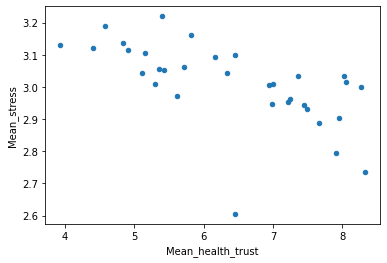

In [110]:
country_fltr.plot(x='Mean_health_trust', y='Mean_stress', kind='scatter');

Cool! It seems like there is a negative correlation between these two variables. Can you spot the outlier? Find out which country this datapoint corresponds to. 

In [111]:
country_fltr[country_fltr.Mean_stress < 2.7]

,Mean_stress,Mean_gov_trust,Mean_health_trust,Mean_measures_trust,Count
Country,,,,,
Japan,2.605118,4.00631,6.444263,2.978032,4279


### A Closer Look at the UK

In this section we will draw comparisons between the United Kingdom and the rest of Europe. We have provided an Excel spreadsheet in the [session materials](https://education.wdss.io/python-for-data-science/session-one/) that maps countries to continents, which can be used to aid in this comparison. Start by loading this dataset into the notebook.

In [73]:
country_map = pd.read_excel("data/countries_by_continent.xlsx")

Create a pandas series of all European countries except the United Kingdom.

In [76]:
europe = country_map['Country'][
    (country_map['Continent'] == "Europe") &
    (country_map['Country'] != "United Kingdom")
]

Use this series to create two dataframes, `uk_df` and `euro_df` containing observations from the UK and rest of Europe respectively.

In [86]:
uk_df = covid_df[covid_df['Country'] == "United Kingdom"]
euro_df = covid_df[covid_df['Country'].isin(europe)]

Is the average stress level in the UK above or below average of the rest of Europe? By how much? 

In [90]:
uk_mean_stress = uk_df['Avg_stress'].mean()
euro_mean_stress = euro_df['Avg_stress'].mean()

if uk_mean_stress > eu_mean_stress:
    print("The UK has a higher average stress level by",
          str(round(100 * (uk_mean_stress / euro_mean_stress - 1), 2)) + "%")
else:
    print("The rest of Europe has a higher average stress level by",
          str(round(100 * (euro_mean_stress / uk_mean_stress - 1), 2)) + "%")

The UK has a higher average stress level by 1.58%


What proportion of people in the UK aged between 40 and 60 (inclusive) reported an average stress level above 3? This is a longer question so try to break it up into sensible chunks.

In [95]:
uk_middle_aged = uk_df[(uk_df.Dem_age >= 40) & (uk_df.Dem_age <= 60)]
(uk_middle_aged['Avg_stress'] > 3).mean().round(3)

0.394

What the average stress level for each employment status and gender pair in Europe? (Note: you can use a list of labels when grouping a dataframe)

In [92]:
euro_df.groupby(['Dem_employment', 'Dem_gender']).mean()[['Avg_stress']]

Avg_stress
Dem_employment     Dem_gender                            
Full time employed Female                        2.960419
                   Male                          2.875633
                   Other/would rather not say    3.047826
Not employed       Female                        3.021073
                   Male                          2.926990
                   Other/would rather not say    3.034000
Part time employed Female                        2.963491
                   Male                          2.900000
                   Other/would rather not say    2.993478
Retired            Female                        2.873963
                   Male                          2.790598
                   Other/would rather not say    3.106250
Self-employed      Female                        2.986284
                   Male                          2.900577
                   Other/would rather not say    2.976190
Student            Female                        3.090037
                   Male                          2.952719
                   Other/would rather not say    3.112821

> Wow! What happened there? We've just been introduced to the pandas multi-index, a relatively unique feature of the package which offers incredible power and flexibility. This is considered an advanced feature and so we will not go into any more detail about it but you can read more [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

Did the trust in government tend to increase/decrease or remain stable over the period considered in the report? Compare the mean trust in government in first 3 weeks of April starting from 2020-04-06.

You can do this using base Python `for` loops. Loop through through consecutive pairs of days in the provided date list and calculate the mean trust in government for an subset of the dataset filtered to only have days between the current date in the list and 7 days in the future.

In [101]:
# Calculate the weekly average trust in government
days = ['2020-04-06', '2020-04-13', '2020-04-20', '2020-04-27']
weekly_mean_trust = []

# Loop through pairs of consecutive days in `days`
for d1, d2 in zip(days[:-1], days[1:]):
    weekly_mean_trust.append(uk_df[(uk_df.RecordedDate >= d1) &
                                   (uk_df.RecordedDate < d2)]['Trust_gov'].mean())
    
weekly_mean_trust

[5.184357541899441, 4.6415094339622645, 5.428571428571429]

This isn't the most elegant and is certainly not the most efficient. A better solution is below, though it goes to show that pandas and base Python can be used together when needed.

In [104]:
uk_df.groupby(uk_df.RecordedDate.dt.isocalendar().week).mean()['Trust_gov']

week
14    3.794872
15    5.184358
16    4.641509
17    5.428571
18    3.583333
19    4.058824
20    3.166667
21    5.000000
22    2.857143
Name: Trust_gov, dtype: float64

## Your Time to Shine

Come up with some new questions about this dataset and try to answer them using your newly obtained skills.